In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [3]:
DATASET_DIR = "../dataset/classification/adult"
SAVE_NAME = "adult.csv"

In [4]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,is_married
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Yes
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,No
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Yes
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Yes
32557,40,Private,154374,HS-grad,9,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Yes
32558,58,Private,151910,HS-grad,9,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Yes
32559,22,Private,201490,HS-grad,9,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,No


In [5]:
features_ori = df.drop(columns=["is_married","income"])
features_ori.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [ ]:
features_ori = df.drop(columns=["is_married","income"])
is_cat_cols = features_ori.dtypes == object
cat_cols = features_ori.columns[is_cat_cols]
num_cols = features_ori.columns[~is_cat_cols]

onehot = OneHotEncoder(sparse=False)
features_cat = onehot.fit_transform(features_ori[cat_cols])

features_num = features_ori[num_cols].values

print(features_cat.shape, features_num.shape)
features = np.concatenate([features_num, features_cat], axis=1)
features.shape

In [ ]:
flag = (df["is_married"]=="Yes").values
features[flag].shape

In [ ]:
tsne = TSNE(perplexity=50, random_state=0)
features_embedd = tsne.fit_transform(features)

In [8]:
# features_embedd

In [77]:
df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
df_embedd["is_married"] = df["is_married"]
df_embedd["income"] = df["income"]

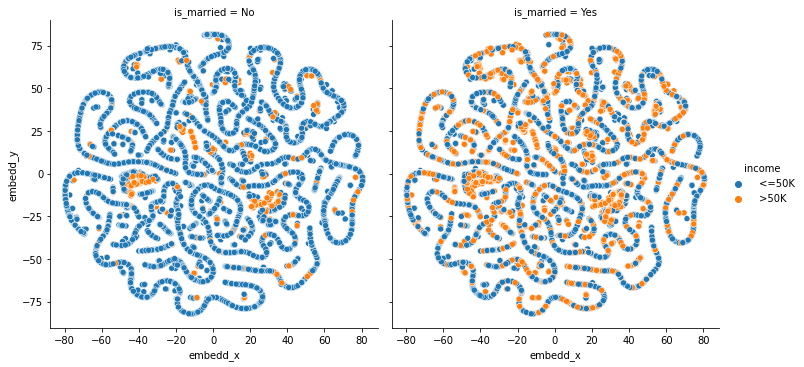

In [78]:
sns.relplot(x="embedd_x", y="embedd_y", col="is_married", hue="income", data=df_embedd)

In [16]:
from sklearn.preprocessing import StandardScaler

In [27]:
def plot_tsne(col):

    features_ori = df.drop(columns=[col,"income"]).sample(1000)
    is_cat_cols = features_ori.dtypes == object
    cat_cols = features_ori.columns[is_cat_cols]
    num_cols = features_ori.columns[~is_cat_cols]

    onehot = OneHotEncoder(sparse=False)
    features_cat = onehot.fit_transform(features_ori[cat_cols])

    features_num = features_ori[num_cols].values

    print(features_cat.shape, features_num.shape)
    features_ori = np.concatenate([features_num, features_cat], axis=1)
    scaler = StandardScaler()
    features = scaler.fit_transform(features_ori)

    tsne = TSNE(perplexity=10, random_state=0)
    features_embedd = tsne.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[col] = df[col]
    df_embedd["income"] = df["income"]

    sns.relplot(x="embedd_x", y="embedd_y", col=col, hue="income", data=df_embedd)

(1000, 80) (1000, 6)


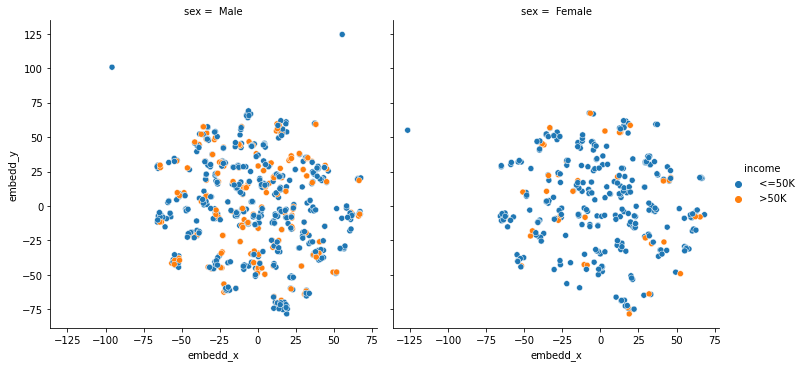

In [28]:
plot_tsne("sex")

(1000, 81) (1000, 6)


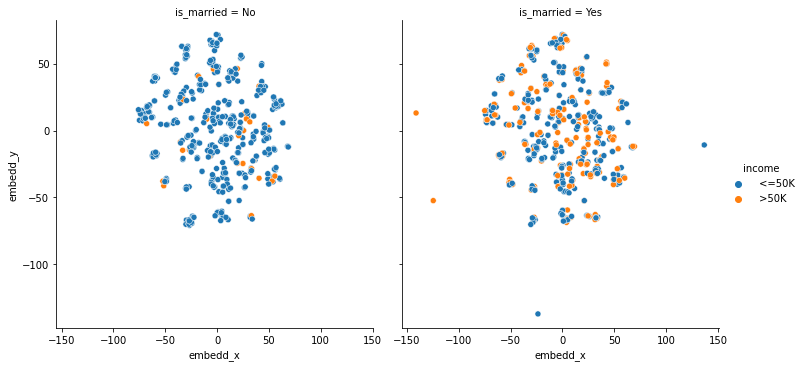

In [29]:
plot_tsne('is_married')